In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np

from matplotlib import pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

m, n = 28, 28
P  = 200
T = 2
n_train, n_test = 60000, 10000

train_images = train_images.reshape((n_train, m, n))
test_images = test_images.reshape((n_test, m, n))

# Normalize pixel values to be between 0 and 1
train_images, target_images = train_images / 255.0, train_images / 255.0

In [2]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(m, n)))
model.add(layers.Dense(P))
model.add(layers.Dense(m * n * T, activation='relu'))
model.add(layers.Dense(m * n))
model.add(layers.Reshape((m, n)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 1568)              315168    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1230096   
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 1,702,264
Trainable params: 1,702,264
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train_images, target_images, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0110 - accuracy: 0.2488
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0054 - accuracy: 0.3370
Epoch 3/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0046 - accuracy: 0.3603
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0043 - accuracy: 0.3728
Epoch 5/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0040 - accuracy: 0.3821
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0038 - accuracy: 0.3889
Epoch 7/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0037 - accuracy: 0.3938
Epoch 8/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0036 - accuracy: 0.3980
Epoch 9/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0034 - accuracy: 0.4026
Epo

In [4]:
# Normalize pixel values to be between 0 and 1
test_images, test_target_images = test_images / 255.0, test_images / 255.0

# Use test_mse from metrics return instead of test_loss in reference to @taehoonlee at https://github.com/keras-team/keras/issues/6518
# "Your loss includes the l2-penalty of two embedding_input matrices. 
#     In other words, Keras Evaluated MSE (1.53255516829) is a sum of MSE from Keras Predictions (0.987516968974) and 1e-4 * (sum of squares of both user_in and movie_in weights)."
test_loss, test_acc = model.evaluate(test_images, test_target_images)

decompressed_image = model.predict(test_images)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

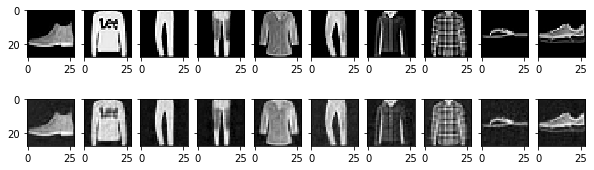

In [5]:
n_images = 10

f, axarr = plt.subplots(2, n_images,figsize=(10, 3), sharey=True)

for i in range(n_images):
    axarr[0, i].imshow(test_target_images[i], cmap='gray')
    axarr[1, i].imshow(decompressed_image[i], cmap='gray')

plt.show()

In [8]:
PSNR = 0

for i in range(n_test):
    MSE = tf.keras.losses.MeanSquaredError()
    test_mse = MSE(test_target_images[i], decompressed_image[i])
    PSNR += 10 * np.log10(1 / test_mse)
    
PSNR = PSNR / n_test

print(PSNR)

25.737120225787162
